  0%|          | 0/323 [00:00<?, ?it/s]

C:\Users\angel\Documents\GitHub\Hforge\Data\aBN_HSX_graphs\2_atoms\graph_2atoms_0001.pt


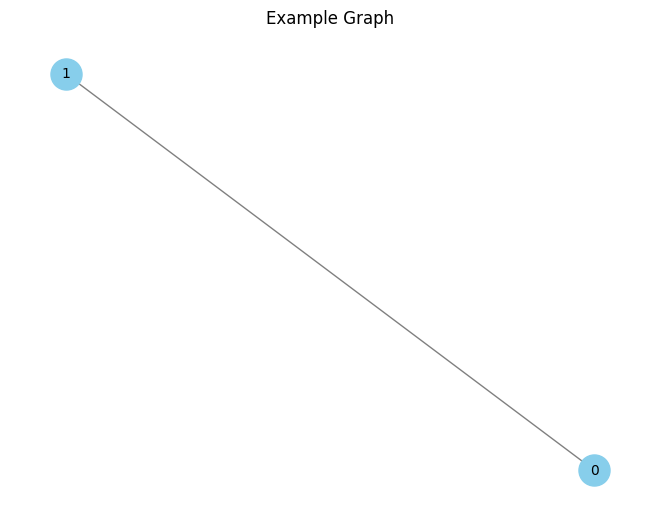

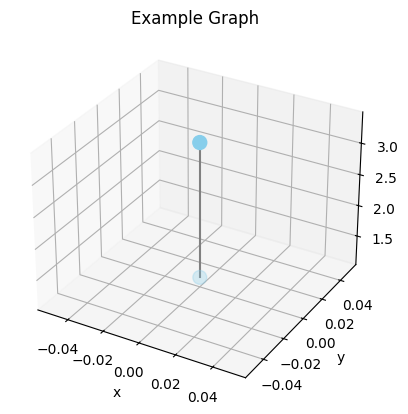

  0%|          | 0/323 [00:00<?, ?it/s]


In [2]:
import os
from matplotlib import pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx
from tqdm import tqdm

from hforge.data_management.dataset_load import load_graph_dataset_from_parent_dir
from hforge.graph_dataset import LazyGraphDataset
from hforge.utils.importing_facilities import load_config

def plot_graph(graph, title="Graph"):
    G = to_networkx(graph, to_undirected=True)
    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
    plt.title(title)
    plt.show()

def plot_graph_3d(graph, title="Graph"):
    G = to_networkx(graph, to_undirected=True)
    pos = {i: graph.pos[i].numpy() for i in range(graph.num_nodes)}

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Draw nodes
    xs, ys, zs = zip(*[pos[i] for i in G.nodes()])
    ax.scatter(xs, ys, zs, c='skyblue', s=100)

    # Draw edges
    for edge in G.edges():
        x = [pos[edge[0]][0], pos[edge[1]][0]]
        y = [pos[edge[0]][1], pos[edge[1]][1]]
        z = [pos[edge[0]][2], pos[edge[1]][2]]
        ax.plot(x, y, z, c='gray')

    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

# Load the dataset from disk
dataset_place_alapena = r"../../Data/aBN_HSX_alapena"
dataset_place_andrei = r"../../Data/aBN_HSX"
graph_dataset = r"C:\Users\angel\Documents\GitHub\Hforge\Data\aBN_HSX_graphs\2_atoms"

# Plot
config = load_config("../training_loop/training_loop_config.yaml")
dataset_config = config["dataset"]
orbitals = config["orbitals"]

dataset = LazyGraphDataset(n_atoms_dir=graph_dataset, max_samples=None, seed=None)

for i in tqdm(range(len(dataset))):
    i=1
    graph = dataset[i]
    plot_graph(graph, title="Example Graph")
    plot_graph_3d(graph, title="Example Graph")
    break
